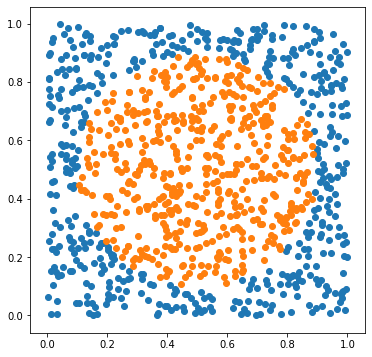

In [1]:
import torch
import math
import matplotlib.pyplot as plt

import ModulesSalvage as MS
import SequentialSalvage as SS 
import OptimizerSalvage as OS

from helpers import *

torch.set_grad_enabled(False)

data, target, data_test, target_test = generate_disc_set(1000, show_data=True)
data, data_test = normalize_data(data, data_test)

In [2]:
m1 = MS.Linear(2,25)
m2 = MS.Linear(25,25)
m3 = MS.Linear(25,25)
m4 = MS.Linear(25,2)
relu = MS.ReLu()

model = SS.Sequential(m1,relu,m2,relu,m3,relu,m4)

In [3]:
criterion = MS.MSE()
#criterion = MS.CrossEntropyLoss()
optimizer = OS.SGD(model.param(),eta=1e-1)

mini_batch_size = 100
nb_epochs = 250

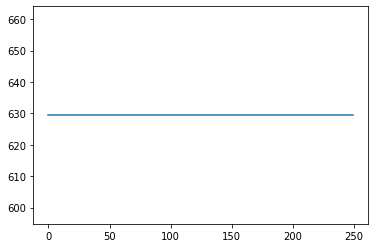

In [4]:
losses = train_model(model, criterion, optimizer, data, target, nb_epochs, mini_batch_size)
plt.plot(losses)
plt.show()

In [5]:
print('TRAIN ERROR = {:.2f}%'.format(compute_nb_errors(model, data, target, mini_batch_size) / data.size(0) * 100))
print('TEST ERROR = {:.2f}%'.format(compute_nb_errors(model, data_test, target_test, mini_batch_size) / data_test.size(0) * 100))

TRAIN ERROR = 51.20%
TEST ERROR = 49.60%
